# Sci-kit Learn
## Required Imports

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [3]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

iris_results = {}
digits_results = {}
cancer_results = {}

In [4]:
iris = datasets.load_iris()
digits = datasets.load_digits()
cancer = datasets.load_breast_cancer()
datasets = [iris, digits, cancer]
ds_names = ['iris', 'digits', 'cancer']

In [5]:
for ds_name, ds in zip(ds_names, datasets):
    X, y = ds.data, ds.target
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)
    
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        if ds_name == 'iris':
            iris_results[name] = score
        elif ds_name == 'digits':
            digits_results[name] = score
        else:
            cancer_results[name] = score

/home/naman/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/naman/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/naman/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


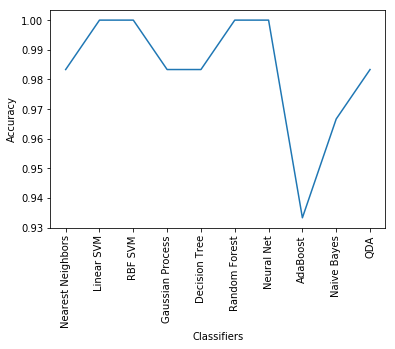

In [6]:
acc = []
for key in names:
    acc.append(iris_results[key])
x = range(len(acc))

plt.plot(x, acc)
plt.xticks(x, names, rotation=90)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.show()

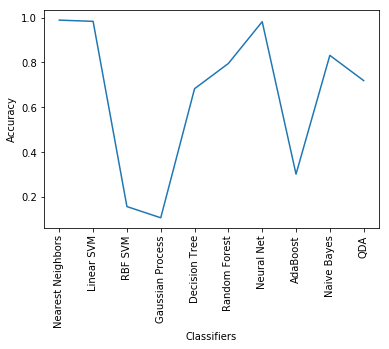

In [8]:
acc = []
for key in names:
    acc.append(digits_results[key])
x = range(len(acc))

plt.plot(x, acc)
plt.xticks(x, names, rotation=90)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.show()

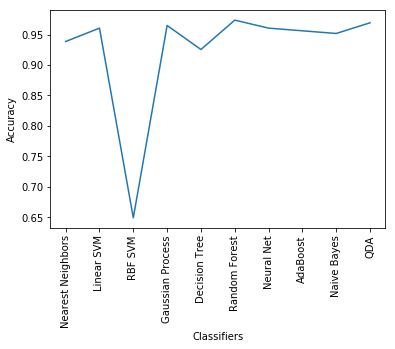

In [9]:
acc = []
for key in names:
    acc.append(cancer_results[key])
x = range(len(acc))

plt.plot(x, acc)
plt.xticks(x, names, rotation=90)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.show()